# Actividad Evaluable: Mapas de calor y boxplots

## Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importación de dataset

In [ ]:
df = pd.read_csv('online_retail-1.csv', encoding='latin1') # Cargar el dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.0,United Kingdom


## Limpieza de dataset

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convertir a datetime
df['Total_price'] = df['Quantity'] * df['Price'] # Crear columna de ingreso total por transacción
df['Customer ID'] = df['Customer ID'].astype('Int64') # Convertir a entero (permite NaN)
df.dropna(inplace=True) # Eliminar filas con valores nulos
print(df.isna().sum()) # Verificar valores nulos
print(df.dtypes) # Verificar tipos de datos

C:\Users\frado\AppData\Local\Temp\ipykernel_22056\3102865027.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
dtype: int64
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             Int64
Country                object
Total_price           float64
dtype: object


## Histogramas

### Top 10 productos más comprados

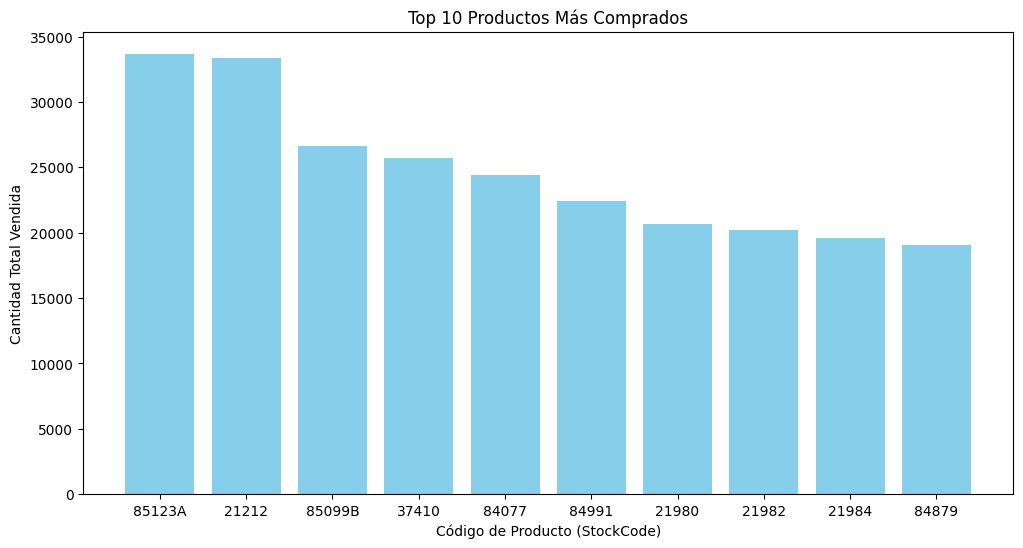

In [4]:
# Extraer top 10 productos más comprados
top_10_productos = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)


# Preparar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_productos['StockCode'], top_10_productos['Quantity'], color='skyblue')
plt.title('Top 10 Productos Más Comprados')
plt.xlabel('Código de Producto (StockCode)')
plt.ylabel('Cantidad Total Vendida')
plt.show()


### Top 10 clientes que más gastan

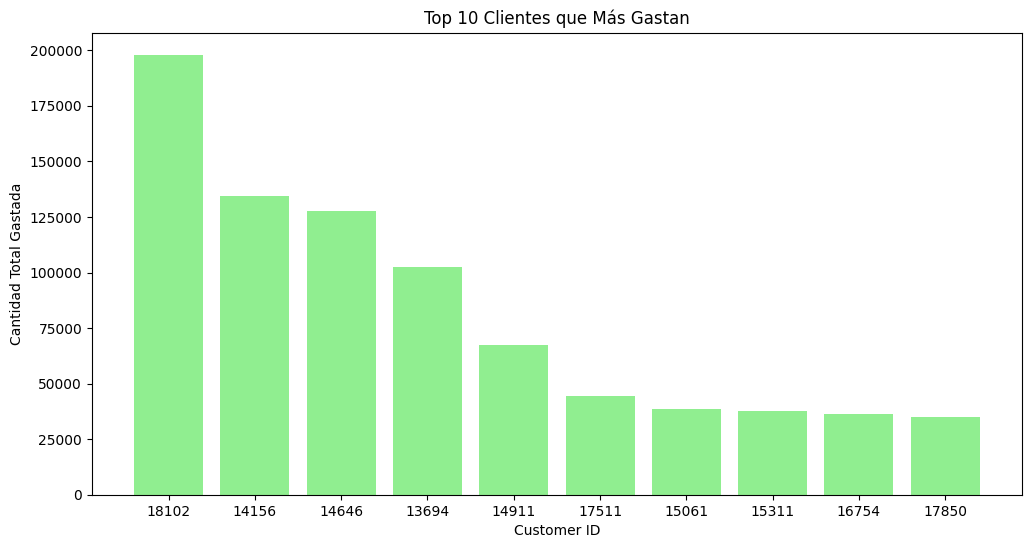

In [5]:
# Extraer top 10 clientes que más gastan
top_10_clientes = df.groupby('Customer ID')['Total_price'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_clientes['Customer ID'] = top_10_clientes['Customer ID'].astype(str)

# Preparar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_clientes['Customer ID'], top_10_clientes['Total_price'], color='lightgreen')
plt.title('Top 10 Clientes que Más Gastan')
plt.xlabel('Customer ID')
plt.ylabel('Cantidad Total Gastada')
plt.show()

### Horas más concurridas

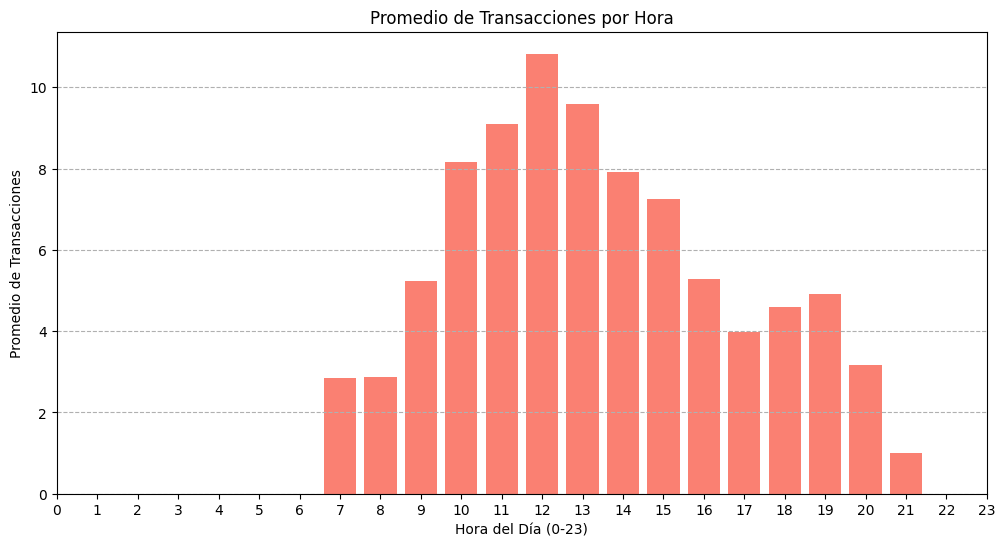

In [6]:
# Extraer fecha y hora
df['Date'] = df['InvoiceDate'].dt.date
df['Hour'] = df['InvoiceDate'].dt.hour

# Calcular transacciones únicas por hora y por día
transactions_per_hour_per_day = df.groupby(['Date', 'Hour'])['Invoice'].nunique().reset_index()
transactions_per_hour_per_day.rename(columns={'Invoice': 'UniqueInvoices'}, inplace=True)

# Calcular el promedio de transacciones por hora
average_transactions_per_hour = transactions_per_hour_per_day.groupby('Hour')['UniqueInvoices'].mean().reset_index()

# Preparar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(average_transactions_per_hour['Hour'], average_transactions_per_hour['UniqueInvoices'], color='salmon')
plt.title('Promedio de Transacciones por Hora')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Promedio de Transacciones')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')
plt.show()

### Cantidad de transacciones por país

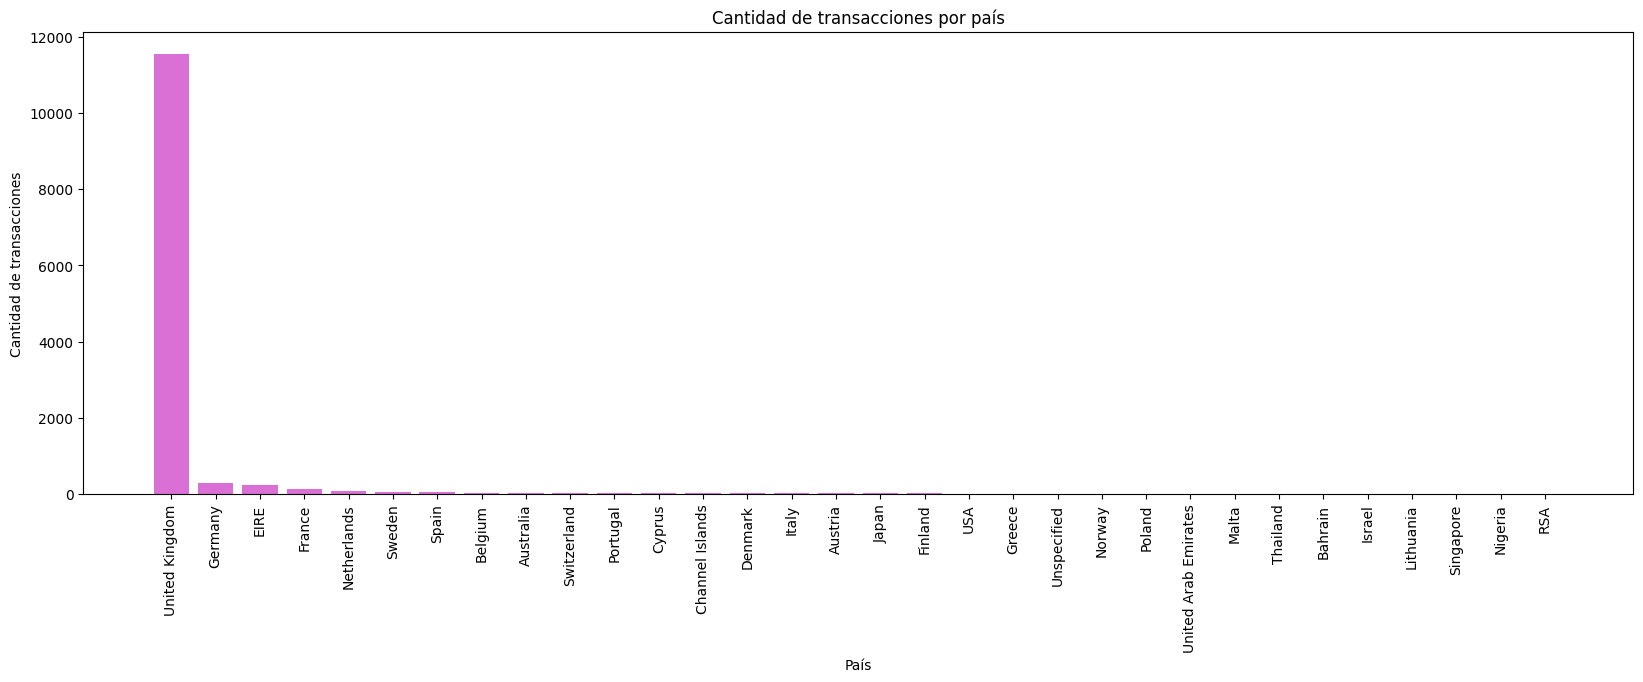

In [ ]:
# Extraer cantidad de transacciones por país
transactions_per_country = df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False).reset_index()


# Preparar el gráfico de barras
plt.figure(figsize=(20, 6))
plt.bar(transactions_per_country['Country'], transactions_per_country['Invoice'], color='orchid')
plt.title('Cantidad de transacciones por país')
plt.xlabel('País')
plt.ylabel('Cantidad de transacciones')
plt.xticks(rotation=90)
plt.show()

## Boxplots

### Distribución de transacciones por día de la semana

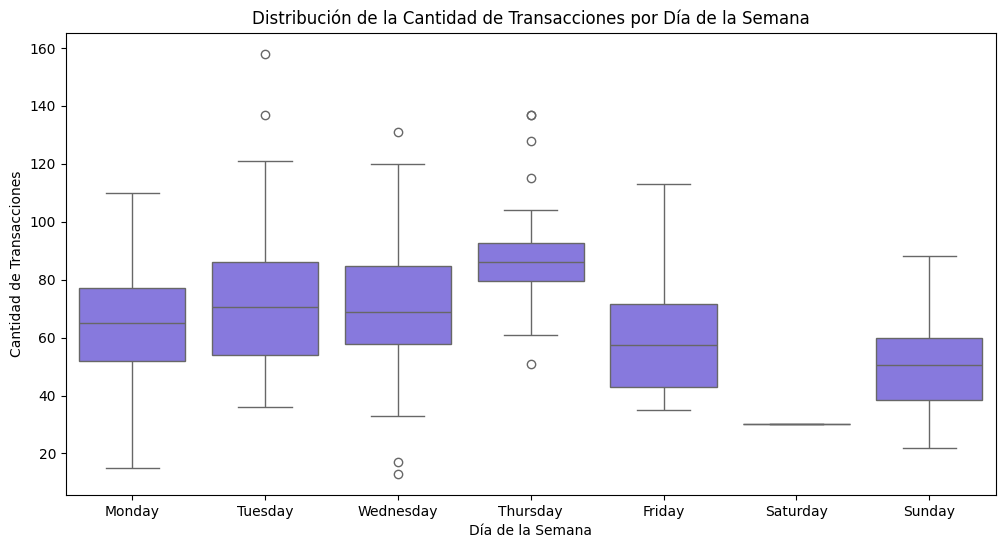

In [8]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name() # Nombre del día de la semana

df['Week'] = df['InvoiceDate'].dt.isocalendar().week # Número de semana del año

df['Year'] = df['InvoiceDate'].dt.year # Año

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Orden de los días de la semana

transactions_per_day = df.groupby(['Year', 'Week', 'DayOfWeek'])['Invoice'].nunique().reset_index() # Transacciones únicas por día de la semana


# Preparar el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Invoice', data=transactions_per_day, order=day_order, color='mediumslateblue')
plt.title('Distribución de la Cantidad de Transacciones por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Transacciones')
plt.show()

### Distribución de ingreso por país

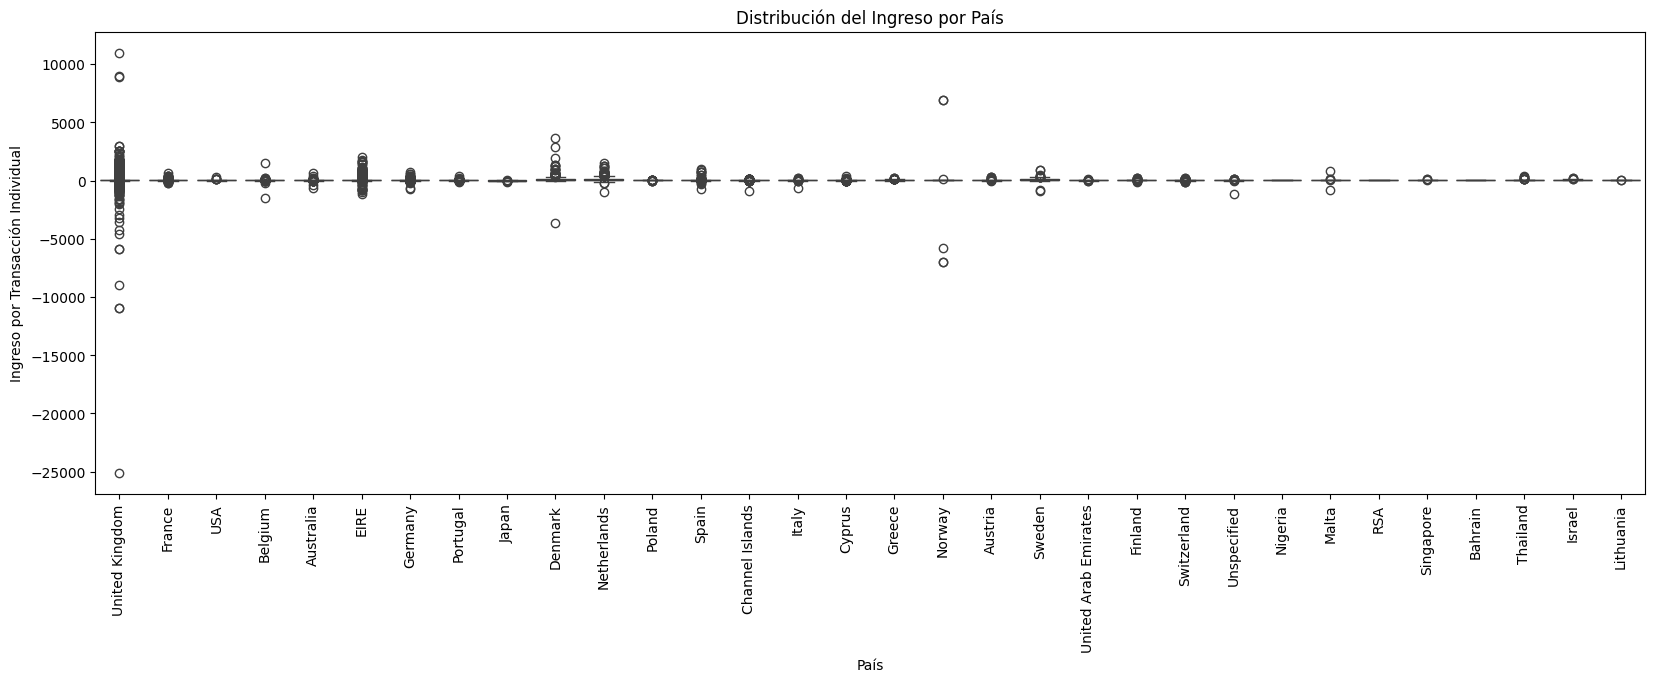

In [9]:
# Preparar el gráfico de boxplot para la distribución del ingreso por país
plt.figure(figsize=(20, 6))
sns.boxplot(x='Country', y='Total_price', data=df)
plt.title('Distribución del Ingreso por País')
plt.xlabel('País')
plt.ylabel('Ingreso por Transacción Individual')
plt.xticks(rotation=90)
plt.show()

## Mapa de calor para correlación

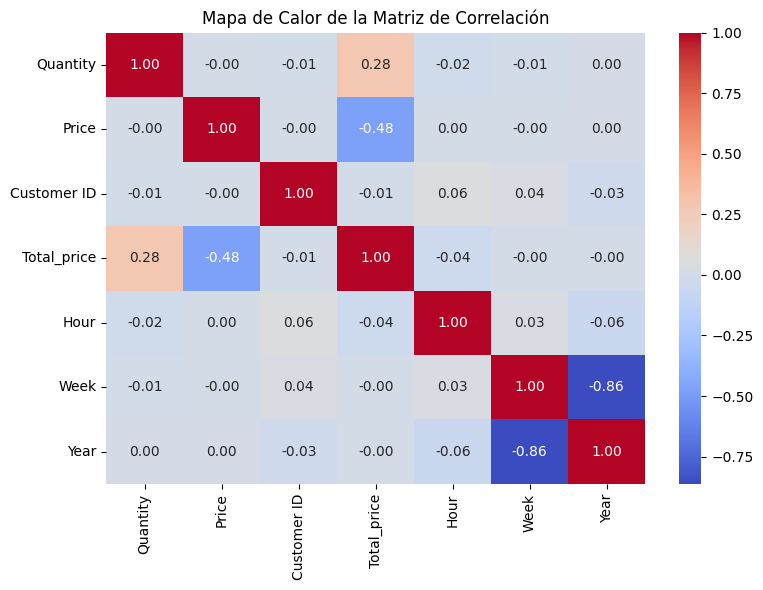

In [ ]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Preparar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.tight_layout()
plt.show()